# Logistic Regression

## [Step-1] Importing necessary libraries

In [68]:
# Reading the "DataFrame"
import pandas as pd

# Mathematical Calculation
import numpy as np

# Ploting the graph
import matplotlib.pyplot as plt
import seaborn as sns

# "Pre-Processing"
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# For handling "continuos values" and "categorical values"
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Metric evaluation"
from sklearn.metrics import confusion_matrix, classification_report, f1_score, roc_curve

credits: https://www.kaggle.com/datasets/arunavakrchakraborty/australia-weather-data

## [Step-2] Reading Data from "csv files"

In [69]:

data = pd.read_csv('D:/[Z] Python [Sanjeev]/Python Practice/[15] Weather Training Data.csv')
test = pd.read_csv('D:/[Z] Python [Sanjeev]/Python Practice/[15] Weather Test Data.csv')

In [70]:
data.columns

Index(['row ID', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

### A glance at Datasets

In [71]:
data.head()

,row ID,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Row0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0
1,Row1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0
2,Row2,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0
3,Row3,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,0
4,Row4,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,0


In [72]:
test.head()

,row ID,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,Row0,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No
1,Row1,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No
2,Row2,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,...,24.0,49.0,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No
3,Row3,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,28.0,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No
4,Row4,Albury,15.9,18.6,15.6,NaN,NaN,W,61.0,NNW,...,28.0,76.0,93.0,994.3,993.0,8.0,8.0,17.4,15.8,Yes


In [73]:
data.describe(include='all')

,row ID,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
count,99516,99516,99073.000000,99286.000000,98537.000000,56985.00000,52199.000000,92995,93036.000000,92510,...,98283.000000,97010.000000,89768.000000,89780.000000,61944.000000,59514.000000,98902.000000,97612.000000,98537,99516.000000
unique,99516,49,NaN,NaN,NaN,NaN,NaN,16,NaN,16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN
top,Row0,Canberra,NaN,NaN,NaN,NaN,NaN,W,NaN,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN
freq,1,2393,NaN,NaN,NaN,NaN,NaN,6843,NaN,8052,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76481,NaN
mean,NaN,NaN,12.176266,23.218513,2.353024,5.46132,7.615090,NaN,39.976966,NaN,...,68.866376,51.433296,1017.684638,1015.286204,4.447985,4.519122,16.970041,21.681340,NaN,0.224677
std,NaN,NaN,6.390882,7.115072,8.487866,4.16249,3.783008,NaN,13.581524,NaN,...,19.074951,20.777616,7.110166,7.045189,2.886580,2.716618,6.488961,6.931681,NaN,0.417372
min,NaN,NaN,-8.500000,-4.100000,0.000000,0.00000,0.000000,NaN,6.000000,NaN,...,0.000000,0.000000,980.500000,978.200000,0.000000,0.000000,-7.000000,-5.100000,NaN,0.000000
25%,NaN,NaN,7.600000,17.900000,0.000000,2.60000,4.800000,NaN,31.000000,NaN,...,57.000000,37.000000,1013.000000,1010.500000,1.000000,2.000000,12.300000,16.600000,NaN,0.000000
50%,NaN,NaN,12.000000,22.600000,0.000000,4.80000,8.400000,NaN,39.000000,NaN,...,70.000000,52.000000,1017.700000,1015.300000,5.000000,5.000000,16.700000,21.100000,NaN,0.000000
75%,NaN,NaN,16.800000,28.200000,0.800000,7.40000,10.600000,NaN,48.000000,NaN,...,83.000000,65.000000,1022.400000,1020.000000,7.000000,7.000000,21.500000,26.400000,NaN,0.000000


## [Step-3] Pre-processing Steps
- We shall be processing both the datasets simultaneously.
- "row ID" is unique in identifier and need not be necessary for training/prediction in both "data sets"
- So drop it from both the datasets.

In [74]:
data.drop('row ID', axis=1, inplace=True)
test.drop('row ID', axis=1, inplace=True)

### Let us see how many "Nul values" are present in each column in "Train data set"

In [75]:
data.isnull().sum()*100/data.shape[0]

Location          0.000000
MinTemp           0.445155
MaxTemp           0.231119
Rainfall          0.983761
Evaporation      42.737851
Sunshine         47.547128
WindGustDir       6.552715
WindGustSpeed     6.511516
WindDir9am        7.040074
WindDir3pm        2.660879
WindSpeed9am      0.939547
WindSpeed3pm      1.843925
Humidity9am       1.238997
Humidity3pm       2.518188
Pressure9am       9.795410
Pressure3pm       9.783351
Cloud9am         37.754733
Cloud3pm         40.196551
Temp9am           0.616986
Temp3pm           1.913260
RainToday         0.983761
RainTomorrow      0.000000
dtype: float64

### Let us see how many "Nul values" are present in each column in "Test data set"

In [76]:
test.isnull().sum()*100/data.shape[0]

Location          0.000000
MinTemp           0.194944
MaxTemp           0.092447
Rainfall          0.429077
Evaporation      18.401061
Sunshine         20.598698
WindGustDir       2.822662
WindGustSpeed     2.803569
WindDir9am        3.021625
WindDir3pm        1.135496
WindSpeed9am      0.415009
WindSpeed3pm      0.798867
Humidity9am       0.543631
Humidity3pm       1.109369
Pressure9am       4.286748
Pressure3pm       4.265646
Cloud9am         16.163230
Cloud3pm         17.175128
Temp9am           0.291410
Temp3pm           0.825998
RainToday         0.429077
dtype: float64

### Replacing "null values":
- Generally  what we will do means
    - If the "column" is "categorical" then replace with "Mode"
    - If the "column" is "continuos" then look at the distribution and try to replace with "Median"

- From below we observed that the dataset is not uniform. We are having "more number of records for class-0" and less number of records for class-1. 

#### To see in "Target column" how many "1" & "0" are there
#### From the below it was noticed that 
- '0' = 77157
- '1' = 22359
    - It is highly inbalanced dataset. But it is still for better.
    - Here the model is seeing more at "0".
    - Generally when we deal with real world problem then it would be
        - '0' = 98167
        - '1' = 10000

In [77]:
data['RainTomorrow'].value_counts()

RainTomorrow
0    77157
1    22359
Name: count, dtype: int64

#### Fro training purpose we are having '99516' records &
#### For testing purpose we are having '42677' records

In [78]:
data.shape, test.shape

((99516, 22), (42677, 21))

### Here 'null values' are more for 'no' i,e 76481

In [79]:
data['RainToday'].value_counts(dropna=False)

RainToday
No     76481
Yes    22056
NaN      979
Name: count, dtype: int64

### Replace the null values of 'RainToday' with "frequent value/mode"
- More "null values" for "0", so replace with "no"

In [80]:
# replace the null values of RainToday with frequent value/mode
data['RainToday'] = data['RainToday'].fillna('No')
test['RainToday'] = test['RainToday'].fillna('No')
data['RainToday'].isnull().sum()

0

### Lets start checking one by one
### [1] MinTemp

<Axes: xlabel='MinTemp'>

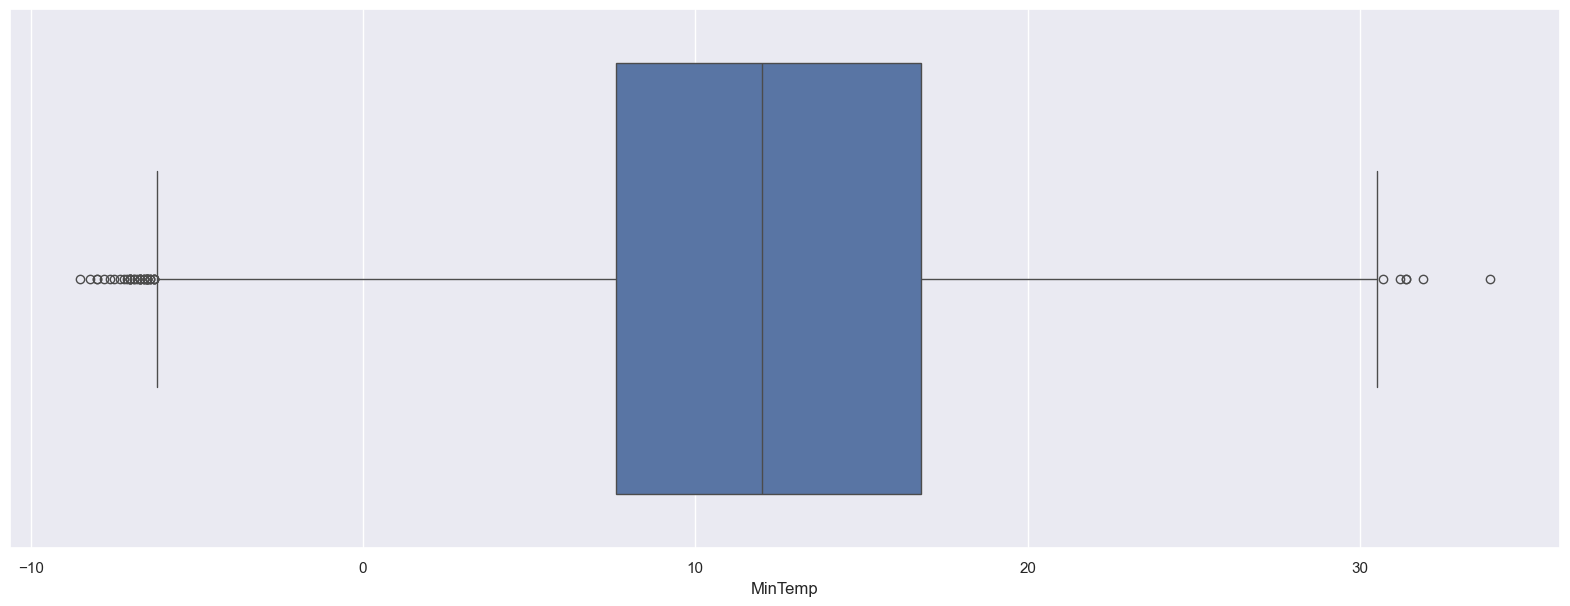

In [81]:
sns.boxplot(data, x='MinTemp')

#### [or]
- From below 
    - mean = 12.176266
    - 50% = 12.000000
- More or less both are same.

In [82]:
data['MinTemp'].describe()

count    99073.000000
mean        12.176266
std          6.390882
min         -8.500000
25%          7.600000
50%         12.000000
75%         16.800000
max         33.900000
Name: MinTemp, dtype: float64

#### I am not doing to replace with "mean", because for example temperature at "Jammu Kasmir" is not equal at "Andhra Pradesh" even though both are in the same country.
#### So what i am doing is that i will calculate the mean at "location level".

### MinTemp and MaxTemp: 
- For a given region, the 'min temp and max temp' would almost be similar/around mean/median.

In [83]:
data['MinTemp'].median()

12.0

- Size of the dataframe is '98' rows

In [84]:
data.groupby(['Location', 'RainToday']).agg({'MinTemp':'median'}).reset_index()

,Location,RainToday,MinTemp
0,Adelaide,No,12.70
1,Adelaide,Yes,10.80
2,Albany,No,13.60
3,Albany,Yes,11.50
4,Albury,No,9.00
...,...,...,...
93,Witchcliffe,Yes,10.70
94,Wollongong,No,14.50
95,Wollongong,Yes,15.50
96,Woomera,No,13.00


### We will use "Tranformer" for replacing this.
- 'Transform' is used when we expect the output to have same number of records as of the main dataFrame.
- Whenever we no need to change the no. of rows then we can use 'transformer'
- Size of the dataframe is '99516'
- Tranformer will not work in all the cases.

In [85]:
data['loc_min'] = data.groupby(['Location', 'RainToday'])['MinTemp'].transform('median')
print("Null values in loc_min", data['loc_min'].isnull().sum())
data.loc[data['MinTemp'].isnull(), 'MinTemp'] = data.loc[data['MinTemp'].isnull(), 'loc_min']
temp_df = data[['Location', 'RainToday', 'loc_min']].drop_duplicates(keep='first')

data.drop('loc_min', axis=1, inplace=True)

test = test.merge(temp_df, on=['Location', 'RainToday'], how='left')
test.loc[test['MinTemp'].isnull(), 'MinTemp'] = test.loc[test['MinTemp'].isnull(), 'loc_min']
test.drop('loc_min', axis=1, inplace=True)

Null values in loc_min 0


In [86]:
print(data['MinTemp'].isnull().sum())
print(test['MinTemp'].isnull().sum())


0
0


### [2] MaxTemp

In [87]:
data['loc_max'] = data.groupby(['Location', 'RainToday'])['MaxTemp'].transform('median')
data.loc[data['MaxTemp'].isnull(), 'MaxTemp'] = data.loc[data['MaxTemp'].isnull(), 'loc_max']
temp_df = data[['Location', 'RainToday', 'loc_max']].drop_duplicates(keep='first')
print(temp_df.head())
data.drop('loc_max', axis=1, inplace=True)

test = test.merge(temp_df, on=['Location', 'RainToday'], how='left')
test.loc[test['MaxTemp'].isnull(), 'MaxTemp'] = test.loc[test['MaxTemp'].isnull(), 'loc_max']
test.drop('loc_max', axis=1, inplace=True)

print(data['MaxTemp'].isnull().sum())
print(test['MaxTemp'].isnull().sum())

           Location RainToday  loc_max
0            Albury        No    23.10
5            Albury       Yes    17.05
2142  BadgerysCreek        No    23.50
2149  BadgerysCreek       Yes    22.30
4183          Cobar        No    26.60
0
0


### [3] Rainfall
- When the rain fall is 'no' then it is '0.0' [put '0' where it is 'no']
- When the rain fall is 'yes' then it is higher than '0.0' 

In [88]:
data[['Rainfall', 'RainToday']].sample(20)

,Rainfall,RainToday
95900,0.0,No
94867,0.0,No
55347,1.4,Yes
16715,0.0,No
17318,0.2,No
3786,10.0,Yes
59601,0.2,No
87232,0.0,No
18416,1.6,Yes
70192,0.2,No


### I will go with 'median' 

In [89]:
data['Rainfall'][(data['Rainfall']>0)&(data['RainToday']=='Yes')].median()

5.2

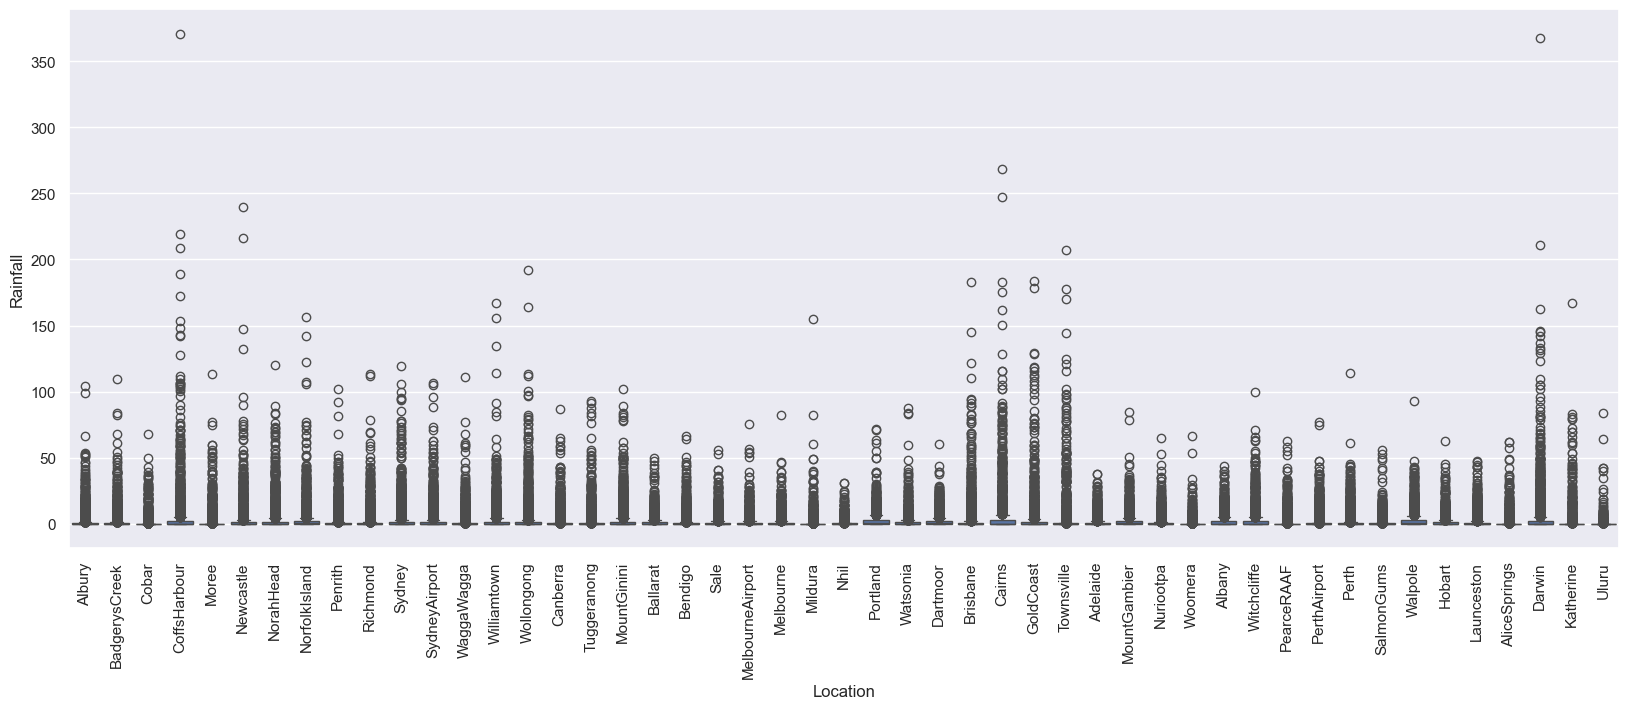

In [90]:
sns.set_theme(rc={'figure.figsize':(20,7)})
ax = sns.boxplot(data, x='Location', y='Rainfall')
ax.tick_params(axis='x', rotation=90)
plt.show()

#### When there is RainToday, there must be some measurement to it.

In [91]:
# if there is RainToday, there must be some non-zero value in Rainfall

data.loc[(data['Rainfall'].isnull())&(data['RainToday']=='No'), 'Rainfall'] = 0
test.loc[(test['Rainfall'].isnull())&(test['RainToday']=='No'), 'Rainfall'] = 0

data.loc[(data['Rainfall'].isnull())&(data['RainToday']=='Yes'), 'Rainfall'] = data['Rainfall'][(data['Rainfall']>0)&(data['RainToday']=='Yes')].median()
test.loc[(test['Rainfall'].isnull())&(test['RainToday']=='Yes'), 'Rainfall'] = data['Rainfall'][(data['Rainfall']>0)&(data['RainToday']=='Yes')].median()


In [92]:
print(data['Rainfall'].isnull().sum())
print(test['Rainfall'].isnull().sum())

0
0


### [4] Evaporation
- The rate of evaporation is lesser when there is rain

In [93]:
data_sale = data[['Location', 'Evaporation', 'RainToday']][data['Location']=='Sale']
data_sale.groupby(['Location','RainToday']).agg({'Evaporation':['mean', 'median']}).reset_index()

Location RainToday Evaporation       
                            mean median
0     Sale        No    3.972154    3.6
1     Sale       Yes    3.106618    2.8

In [94]:
data_sale = data[['Location', 'Evaporation', 'RainToday']][data['Location']=='Canberra']
data_sale.groupby(['Location','RainToday']).agg({'Evaporation':['mean', 'median']}).reset_index()

Location RainToday Evaporation       
                             mean median
0  Canberra        No    4.605288    4.0
1  Canberra       Yes    3.871245    3.2

#### 'Groupby' done 'with location'

In [95]:
data['temp_evo'] = data.groupby(['Location', 'RainToday'])['Evaporation'].transform('median')
data['temp_evo'].isnull().sum()

30968

#### 'Groupby; done 'without location'

In [96]:
data['temp_evo1'] = data.groupby(['RainToday'])['Evaporation'].transform('median')
print(data['temp_evo1'].isnull().sum())
data.loc[data['temp_evo'].isnull(), 'temp_evo'] = data.loc[data['temp_evo'].isnull(), 'temp_evo1']

0


In [97]:
print(data['temp_evo'].isnull().sum())

0


In [98]:
data.loc[data['Evaporation'].isnull(), 'Evaporation'] = data.loc[data['Evaporation'].isnull(), 'temp_evo']
data['Evaporation'].isnull().sum()

0

#### Creating "Temparary dataframe'

In [99]:
temp_df = data[['Location', 'RainToday', 'temp_evo']].drop_duplicates(keep='first')
test = test.merge(temp_df, on = ['Location', 'RainToday'], how='left')
test.loc[test['Evaporation'].isnull(), 'Evaporation'] = test.loc[test['Evaporation'].isnull(), 'temp_evo']
test['Evaporation'].isnull().sum()

0

In [100]:
data.drop(['temp_evo', 'temp_evo1'], axis=1, inplace=True)
test.drop(['temp_evo'], axis=1, inplace=True)

In [101]:
# For "test data set"
print(data['Evaporation'].isnull().sum())

0


In [102]:
# For "test data set"
print(test['Evaporation'].isnull().sum())

0


### In the similar way we have to do for "all continuous columns"
- What we will do it, we will convert these steps in to a "function"
- [A] Function creted for "median"

In [103]:
def _impute_nulls(data, test_df, grp_cols, sub_grp_cols, null_col, agg_type='median'):
    
    # first create the median values - it should not have any nulls
    data['temp_col'] = data.groupby(grp_cols)[null_col].transform(agg_type)
    data['temp_col1'] = data.groupby(sub_grp_cols)[null_col].transform(agg_type)
    
    # in train dataset, assign the agg_type to null values in temp_col column
    data.loc[data['temp_col'].isnull(), 'temp_col'] = data.loc[data['temp_col'].isnull(), 'temp_col1']
    print(f"Null values in temp col for {null_col} is {data['temp_col'].isnull().sum()}")
    
    # impute the median values to null_col in train
    data.loc[data[null_col].isnull(), null_col] = data.loc[data[null_col].isnull(), 'temp_col']

    grp_cols.append('temp_col')
    # for imputing the medians to test, create a join df
    temp_df = data[grp_cols].drop_duplicates(keep='first')
    grp_cols.remove('temp_col')
    test_df = test_df.merge(temp_df, on=grp_cols, how='left')
    test_df.loc[test_df[null_col].isnull(), null_col] = test_df.loc[test_df[null_col].isnull(), 'temp_col']

    print(f"Null values in {null_col} is {data[null_col].isnull().sum()}, {test_df[null_col].isnull().sum()}")

    data.drop(['temp_col', 'temp_col1'], axis=1, inplace=True)
    test_df.drop(['temp_col'], axis=1, inplace=True)
    return data, test_df

### In the similar way we have to do for "all categorical columns"
#### [B] Function creted for "mode"

In [104]:
def get_series_mode(series):
    mode = series.mode()
    if mode.size == 1:
        return mode[0]
    return 'X'

In [105]:
get_series_mode(data['WindGustDir'])

'W'

### [6] 'WindGustDir', 
### [8]'WindDir9am', 
### [9]'WindDir3pm'
- These are the columns we are having 'null values'

In [106]:
cat_cols = ['WindGustDir', 'WindDir9am', 'WindDir3pm']

for col in cat_cols:
    data, test = _impute_nulls(data, test, ['Location', 'RainToday'], ['RainToday'], col, agg_type=get_series_mode)

Null values in temp col for WindGustDir is 0
Null values in WindGustDir is 0, 0
Null values in temp col for WindDir9am is 0
Null values in WindDir9am is 0, 0
Null values in temp col for WindDir3pm is 0
Null values in WindDir3pm is 0, 0


### In the similar way we have to do for "all continuous columns"
- What we will do it, we will convert these steps in to a "function"
- [A] Function creted for "median"
##### [5] 'Sunshine', 
##### [7] 'WindGustSpeed', 
##### [10] 'WindSpeed9am', 
##### [11] 'WindSpeed3pm', 
##### [12] 'Humidity9am',
##### [13] 'Humidity3pm', 
##### [14] 'Pressure9am', 
##### [15] 'Pressure3pm', 
##### [16] 'Cloud9am', 
##### [17] 'Cloud3pm',
##### [18] 'Temp9am', 
##### [19] 'Temp3pm'

In [107]:
for col in ['Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
            'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
            'Temp9am', 'Temp3pm']:
    data, test = _impute_nulls(data, test, ['Location', 'RainToday'], ['RainToday'], col)

Null values in temp col for Sunshine is 0
Null values in Sunshine is 0, 0
Null values in temp col for WindGustSpeed is 0
Null values in WindGustSpeed is 0, 0
Null values in temp col for WindSpeed9am is 0
Null values in WindSpeed9am is 0, 0
Null values in temp col for WindSpeed3pm is 0
Null values in WindSpeed3pm is 0, 0
Null values in temp col for Humidity9am is 0
Null values in Humidity9am is 0, 0
Null values in temp col for Humidity3pm is 0
Null values in Humidity3pm is 0, 0
Null values in temp col for Pressure9am is 0
Null values in Pressure9am is 0, 0
Null values in temp col for Pressure3pm is 0
Null values in Pressure3pm is 0, 0
Null values in temp col for Cloud9am is 0
Null values in Cloud9am is 0, 0
Null values in temp col for Cloud3pm is 0
Null values in Cloud3pm is 0, 0
Null values in temp col for Temp9am is 0
Null values in Temp9am is 0, 0
Null values in temp col for Temp3pm is 0
Null values in Temp3pm is 0, 0


#### Verify if all nulls are handled [Final checking for null values]

In [108]:
data.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [109]:
test.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
dtype: int64

#### [20] RainToday

In [110]:
# For 'Train'
cat_cols.extend(['Location', 'RainToday'])

for col in cat_cols:
    print(col, ":", data[col].nunique())

WindGustDir : 17
WindDir9am : 16
WindDir3pm : 17
Location : 49
RainToday : 2


In [111]:
# 'For Test'
for col in cat_cols:
    print(col, ":", test[col].nunique())

WindGustDir : 17
WindDir9am : 16
WindDir3pm : 17
Location : 49
RainToday : 2


#### To known 'continuos columns'

In [114]:
num_cols = [col for col in data.columns if col not in cat_cols and col!='RainTomorrow']
num_cols

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm']

#### To known 'categorical columns'

In [115]:
cat_cols

['WindGustDir', 'WindDir9am', 'WindDir3pm', 'Location', 'RainToday']

## [Step-4] Converting "categorical columns" in to "numbers"
- By using "label encoding"
- By using "pandas dummies" (or) "one-hot encoding"
     - For this we are creating a 'pipeline' as shown below.

### Encode and Scale

#### [A] Create Pipeline for "Continuous columns"

In [117]:
numeric_transformer = Pipeline(
    steps=[('scaler', StandardScaler())]
)

In [118]:
X_train, X_val, y_train, y_val = train_test_split(
    data.drop('RainTomorrow', axis=1),
    data['RainTomorrow'],
    stratify = data['RainTomorrow'],
    test_size=0.2, random_state=120
)

In [122]:
# Continuos columns
X_train[num_cols]

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
1136,13.5,17.3,33.6,3.2,5.4,52.0,26.0,26.0,83.0,69.0,1010.3,1008.7,8.0,8.0,15.2,15.7
17059,17.1,27.5,0.6,5.2,9.2,20.0,11.0,2.0,89.0,56.0,1018.3,1015.5,4.0,4.0,20.4,25.7
364,8.5,25.4,0.0,5.2,9.2,17.0,7.0,11.0,74.0,38.0,1027.8,1024.4,7.0,6.0,15.8,25.0
28108,6.8,20.3,0.4,1.8,9.0,54.0,24.0,28.0,52.0,36.0,1015.2,1011.1,1.0,6.0,13.5,19.3
9613,16.4,19.5,0.0,5.6,0.7,31.0,13.0,13.0,76.0,83.0,1015.8,1013.0,7.0,7.0,17.6,18.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26144,7.4,17.0,1.2,1.0,7.8,28.0,6.0,13.0,92.0,44.0,1017.4,1015.2,4.0,6.0,10.5,16.1
84829,2.9,21.4,0.0,5.2,9.2,30.0,0.0,19.0,95.0,41.0,1018.3,1015.5,4.0,4.0,13.2,20.8
67043,8.5,18.5,4.0,5.4,11.2,56.0,26.0,24.0,42.0,41.0,1013.6,1015.4,7.0,7.0,14.9,17.3
20563,11.5,29.8,0.0,7.6,9.2,44.0,0.0,13.0,55.0,35.0,1020.0,1017.3,5.0,6.0,18.6,28.6


In [123]:
# Categorical Columns
X_train[cat_cols]

,WindGustDir,WindDir9am,WindDir3pm,Location,RainToday
1136,NNE,NNW,NNW,Albury,Yes
17059,SSW,SW,WSW,Penrith,No
364,ESE,ENE,SSE,Albury,No
28108,WNW,WNW,WNW,Williamtown,No
9613,NE,ENE,NE,Moree,No
...,...,...,...,...,...
26144,WSW,NW,WSW,WaggaWagga,Yes
84829,ESE,N,NE,SalmonGums,No
67043,SW,SSW,SW,Adelaide,Yes
20563,SE,NNE,E,Richmond,No


In [ ]:
# Continuos values
numeric_transformer.fit_transform(X_train[num_cols])

array([[ 0.20661461, -0.8343124 ,  3.75283131, ...,  1.4269665 ,
        -0.27012753, -0.86706896],
       [ 0.7706293 ,  0.6000972 , -0.20530641, ..., -0.30320749,
         0.53099837,  0.57283479],
       [-0.57673911,  0.30477758, -0.27727255, ...,  0.5618795 ,
        -0.17768992,  0.47204153],
       ...,
       [-0.57673911, -0.66555833,  0.20250172, ...,  0.994423  ,
        -0.31634633, -0.63668436],
       [-0.10672688,  0.92354251, -0.27727255, ...,  0.5618795 ,
         0.25368556,  0.99040688],
       [ 0.31628413,  0.92354251, -0.27727255, ..., -1.60083799,
         0.22287302,  0.99040688]])

In [120]:
numeric_transformer.transform(X_val[num_cols])

array([[-0.87441353, -1.46714017,  0.346434  , ..., -0.30320749,
        -1.22531609, -1.60141987],
       [ 1.19364031,  0.81103979, -0.27727255, ..., -0.30320749,
         1.08562398,  0.14086367],
       [ 0.31628413, -0.42649006, -0.27727255, ..., -1.60083799,
        -0.02362725, -0.50709302],
       ...,
       [ 1.67931962,  2.20326088, -0.27727255, ...,  1.4269665 ,
         1.96378121,  2.27192122],
       [ 1.16230616, -0.17335896,  0.46637757, ...,  1.4269665 ,
         0.45396703,  0.01127233],
       [-0.35740007, -0.5811813 ,  1.01811798, ...,  0.994423  ,
        -0.54744033, -0.79507377]])

In [121]:
numeric_transformer.transform(test[num_cols])

array([[ 0.11261217,  0.3469661 , -0.27727255, ..., -1.16829449,
         0.62343597,  0.21285886],
       [-0.46706959,  0.6704114 , -0.27727255, ...,  0.5618795 ,
         0.17665422,  0.68802709],
       [ 0.33195121,  0.24852622, -0.27727255, ...,  0.5618795 ,
         0.17665422,  0.41444538],
       ...,
       [-1.50109651, -0.10304476, -0.27727255, ...,  0.129336  ,
        -1.25612862,  0.05446944],
       [-0.74907693, -0.37023871, -0.27727255, ...,  0.129336  ,
        -0.91719075, -0.20471323],
       [-0.68640864,  0.52978301, -0.27727255, ..., -1.16829449,
        -0.28553379,  0.61603191]])

#### [B] Create Pipeline for "Categorical columns"

In [124]:
categorical_transformer = Pipeline(
    steps=[('encoder', OneHotEncoder(handle_unknown='ignore'))]
)

#### "Column Transformer" to encode and scale features
- We can pass above "2 pipe lines" in to "Column Transformer".
- It will "join" above "2 pipe lines" 

In [125]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_cols),
        ("cat", categorical_transformer, cat_cols),
    ]
)

#### Create one more Pipeline for "Model"

In [126]:
clf = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", LogisticRegression())]
)

In [127]:
clf

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['MinTemp', 'MaxTemp',
                                                   'Rainfall', 'Evaporation',
                                                   'Sunshine', 'WindGustSpeed',
                                                   'WindSpeed9am',
                                                   'WindSpeed3pm',
                                                   'Humidity9am', 'Humidity3pm',
                                                   'Pressure9am', 'Pressure3pm',
                                                   'Cloud9am', 'Cloud3pm',
                                                   'Temp9am', 'Temp3pm']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['WindGustDir', 'WindDir9am',
                                                   'WindDir3pm', 'Location',
                                                   'RainToday'])])),
                ('classifier', LogisticRegression())])

## Model Build and Evaluation
- Pass my "independent features" and "dependent features" like below

In [128]:
clf.fit(X_train, y_train)
print("model score: %.3f" % clf.score(X_val, y_val))

model score: 0.848


In [129]:
#predictions
y_val_hats = clf.predict(X_val)

In [130]:
y_val_hats

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [131]:
y_val_prob = clf.predict_proba(X_val)

In [132]:
y_val_prob

array([[0.82929526, 0.17070474],
       [0.86075806, 0.13924194],
       [0.96849763, 0.03150237],
       ...,
       [0.9654346 , 0.0345654 ],
       [0.07117743, 0.92882257],
       [0.55937676, 0.44062324]])

### Model Evaluation

In [133]:
confusion_matrix(y_val, clf.predict(X_val))

array([[14571,   861],
       [ 2166,  2306]], dtype=int64)

In [134]:
print(classification_report(y_val, clf.predict(X_val)))

              precision    recall  f1-score   support

           0       0.87      0.94      0.91     15432
           1       0.73      0.52      0.60      4472

    accuracy                           0.85     19904
   macro avg       0.80      0.73      0.75     19904
weighted avg       0.84      0.85      0.84     19904



In [135]:
f1_score(y_val, clf.predict(X_val), average='weighted')

0.8380145240802914

### ROC Curve

Text(0, 0.5, 'True Positive Rate')

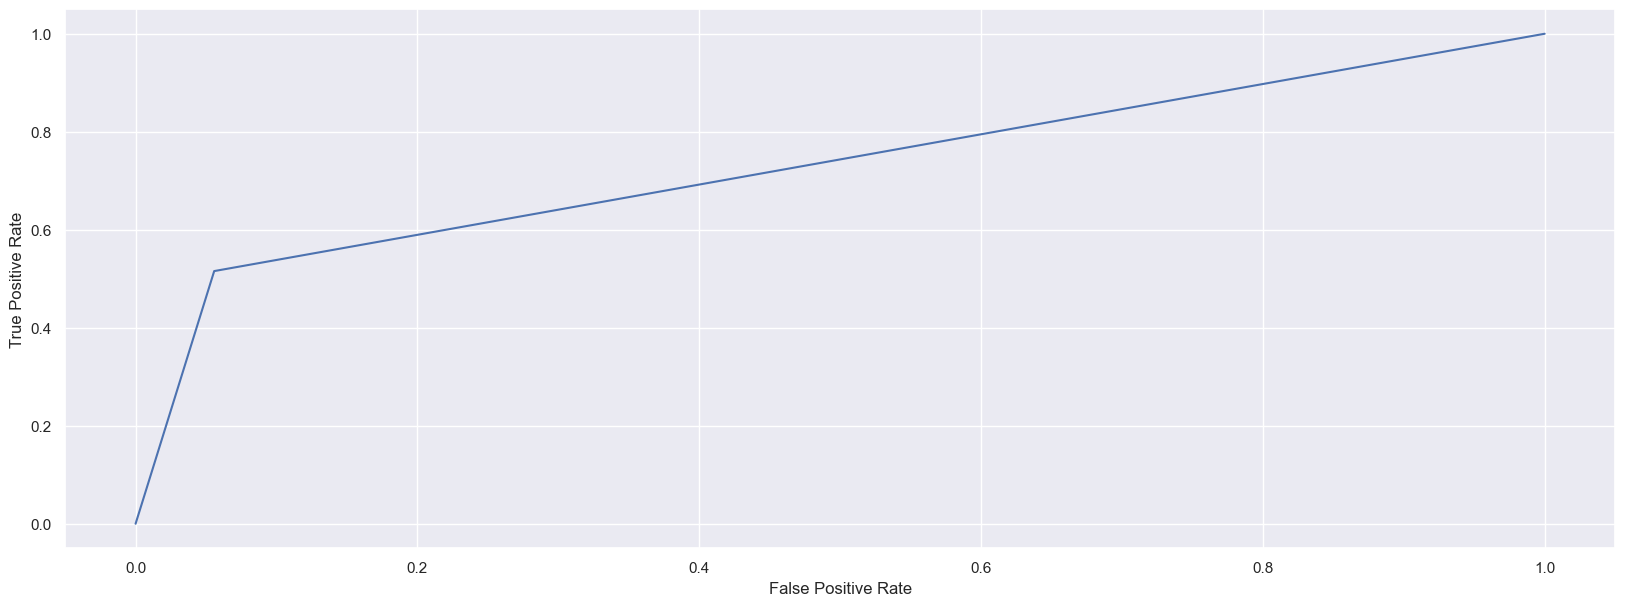

In [136]:
fpr, tpr, thresholds = roc_curve(y_val, clf.predict(X_val))
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [137]:
y_test_hats = clf.predict(test)

In [138]:
y_test_hats

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)